In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
LOWER_PERCENTILE_OUTLIER = 0.1
HIGHER_PERCENTILE_OUTLIER = 0.9

In [168]:
df_Gliwice = pd.read_excel("Gliwice_24h_2007-2014.xlsx", skiprows=3, decimal=",")
df_Wodzislaw = pd.read_excel("Wodzisaw_Gaczynskiego_24h_2007-2014.xlsx", skiprows=3, decimal=',')

In [169]:
df_Gliwice = df_Gliwice.drop(0, axis=0)
df_Gliwice.columns = [f"GLI_{col}" if col != "Unnamed: 0" else "Data" for col in df_Gliwice]
df_Gliwice = df_Gliwice.set_index("Data")
df_Gliwice.head()

,GLI_NO,GLI_NO2,GLI_NOx,GLI_PM10,GLI_PM2.5,GLI_SO2,GLI_cisnienie,GLI_kier,GLI_opad_atm,GLI_predk,GLI_prom,GLI_temp,GLI_wilg
Data,,,,,,,,,,,,,
2007-01-01,NaN,9.521739,NaN,14.666667,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.347826,NaN,22.291667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.47619,NaN,17.217391,NaN,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,20.047619,NaN,13.333333,NaN,10.952381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,13.565217,NaN,13.791667,NaN,3.26087,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
df_Wodzislaw = df_Wodzislaw.drop(0, axis=0)
df_Wodzislaw.columns = [f"WODZ_{col}" if col != "Unnamed: 0" else "Data" for col in df_Wodzislaw]
df_Wodzislaw = df_Wodzislaw.set_index("Data")
df_Wodzislaw.head()

,WODZ_CO,WODZ_NO,WODZ_NO2,WODZ_NOx,WODZ_O3,WODZ_PM10,WODZ_SO2,WODZ_cisnienie,WODZ_kier,WODZ_predk,WODZ_predk.1,WODZ_prom,WODZ_temp,WODZ_wilg
Data,,,,,,,,,,,,,,
2007-01-01,0.440435,NaN,21.173913,NaN,27.347826,33.333333,20.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,0.616522,NaN,31.478261,NaN,23.478261,62.458333,23.454545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,0.623478,NaN,26.652174,NaN,19,60.833333,13.909091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.387391,NaN,20.913043,NaN,23.086957,39.416667,17.227273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,0.442609,NaN,24.521739,NaN,19.826087,42.708333,19.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
df = df_Wodzislaw.join(df_Gliwice).astype('float')

In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WODZ_CO,2861.0,0.541116,0.414958,0.117826,0.267391,0.405217,0.684348,4.202174
WODZ_NO,2059.0,5.322365,7.985007,0.000000,1.347826,2.391304,5.500000,85.363636
WODZ_NO2,2795.0,23.301332,12.033972,3.666667,14.822134,20.608696,29.434783,100.782609
WODZ_NOx,2431.0,31.744109,22.812723,5.000000,17.000000,24.850000,38.913043,219.173913
WODZ_O3,2883.0,42.329005,22.814700,1.833333,23.478261,41.434783,59.717391,116.173913
WODZ_PM10,2370.0,61.907664,50.394909,2.125000,29.375000,45.875000,78.375000,586.583333
WODZ_SO2,2832.0,17.771347,16.734648,1.272727,6.409091,12.086957,23.875000,143.545455
WODZ_cisnienie,2190.0,981.749748,7.512162,951.916667,977.333333,981.958333,986.250000,1003.625000
WODZ_kier,1093.0,190.955129,73.548733,20.708333,139.291667,196.625000,242.500000,352.750000
WODZ_predk,1255.0,0.921505,0.775348,-0.000000,0.081250,0.887500,1.375000,4.129167


In [173]:
quantiles = df.quantile([LOWER_PERCENTILE_OUTLIER, HIGHER_PERCENTILE_OUTLIER])
print(f"ilość danych poniżej kwantylu {LOWER_PERCENTILE_OUTLIER}: {df[df < quantiles.iloc[0]].count().sum()}")
print(f"ilość danych powyżej kwantylu {HIGHER_PERCENTILE_OUTLIER}: {df[df > quantiles.iloc[1]].count().sum()}")
df[(df < quantiles.iloc[0]) | (df > quantiles.iloc[1])] = pd.NA
print(df[df < quantiles.iloc[0]].count().sum())
print(df[df > quantiles.iloc[1]].count().sum())

ilość danych poniżej kwantylu 0.1: 5036
ilość danych powyżej kwantylu 0.9: 5247
0
0


In [174]:
columns_to_analyze = [col for col in df.columns if col.split("_")[1] in ['NO', 'NO2', 'SO2', 'PM10']]

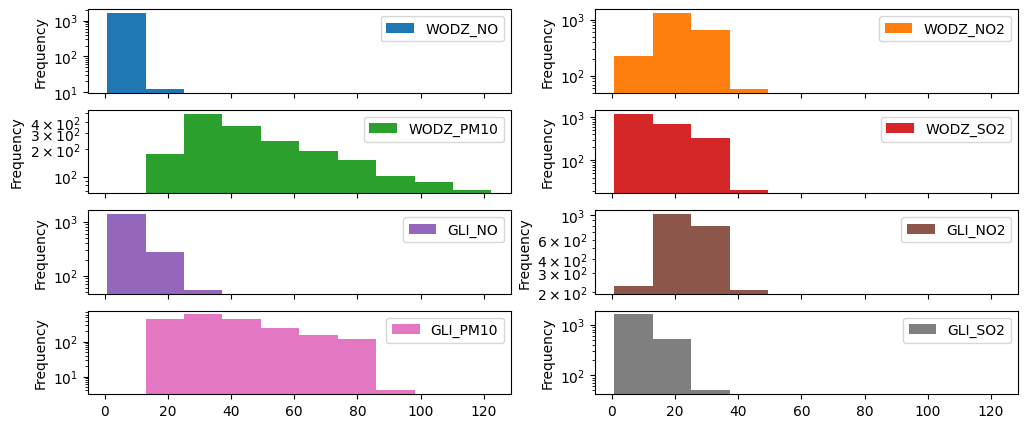

In [185]:
_ = df[columns_to_analyze].plot(kind='hist', subplots=True, layout=(4,2), figsize=(12,5), log=True)


<center><h3><p style="color:red">Nie ma rozkładów normalnych więc w wykresie ramka wąsy będziemy się posługiwać medianą

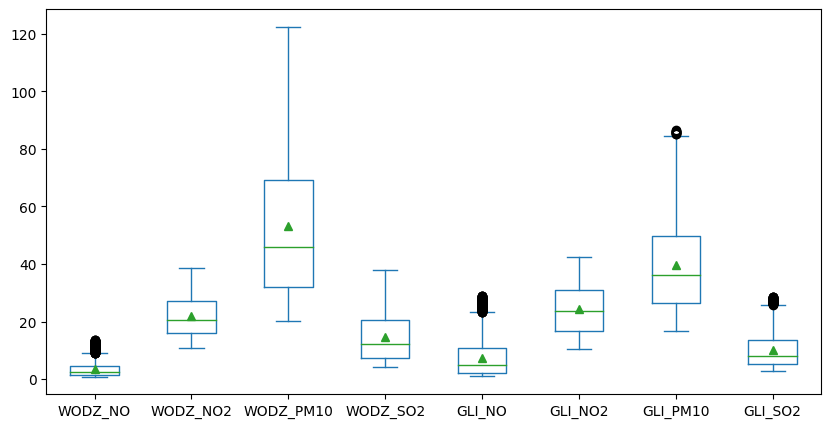

In [205]:
plot = df[columns_to_analyze].plot(kind="box", figsize=(10,5), showmeans=True, return_type="dict")